###  `EDA (Analisis exploratorio de datos)` 

In [36]:
df_games = pd.read_csv("df_games.csv")

In [8]:
# Importamos librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 

In [37]:
# Descripcion general
df_games.describe( include ='all')

,user_id,item_id_x,recommend,review,item_name,playtime_forever,genres,release_date,tags,price,developer,sentiment_analysis
count,16715,16715.000000,16715,16707,16676,16676.000000,16578,16715.000000,16715,16715,16463,16715.000000
unique,16129,NaN,2,15599,2476,NaN,341,NaN,2437,53,1786,NaN
top,76561198027488037,NaN,True,good game,Counter-Strike: Global Offensive,NaN,['Action'],NaN,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...",Free,Valve,NaN
freq,9,NaN,14618,31,240,NaN,2968,NaN,240,4263,1418,NaN
mean,NaN,178014.580437,NaN,NaN,NaN,1716.616935,NaN,2011.740293,NaN,NaN,NaN,1.335328
std,NaN,133674.548894,NaN,NaN,NaN,9627.086518,NaN,4.202397,NaN,NaN,NaN,0.818868
min,NaN,10.000000,NaN,NaN,NaN,0.000000,NaN,1983.000000,NaN,NaN,NaN,0.000000
25%,NaN,17465.000000,NaN,NaN,NaN,0.000000,NaN,2010.000000,NaN,NaN,NaN,1.000000
50%,NaN,219640.000000,NaN,NaN,NaN,72.000000,NaN,2013.000000,NaN,NaN,NaN,2.000000
75%,NaN,271290.000000,NaN,NaN,NaN,493.000000,NaN,2015.000000,NaN,NaN,NaN,2.000000


Destacamos de esta tabla:

- Los juegos tienen fecha desde 1983 a 2017
 - La mayoria de los juegos son FREE
 - La mayoria de los comentarios son positivos
 - Hay un total de 16,715 registros de usuarios. De estos, 16,129 son únicos, lo que indica que algunos usuarios aparecen varias veces.
 

#### Valores duplicados

In [44]:
# Observamos si existen valores duplicados y si afecta en gran medida borrarlos
duplicados = df_games.duplicated(subset=["user_id","item_name","playtime_forever","price"])
duplicados.value_counts()


False    16290
True       425
Name: count, dtype: int64

In [49]:
# Eliminamos valores duplicados 
df_games = df_games.drop_duplicates(subset=["user_id","item_name","playtime_forever","price"])

#### Outliers (valores atipicos)

In [10]:
# Pasamos a tipo numerico la columna "price" y los que son "Free" los pasamos como valores nulos
df_games['price'] = pd.to_numeric(df_games['price'], errors='coerce')

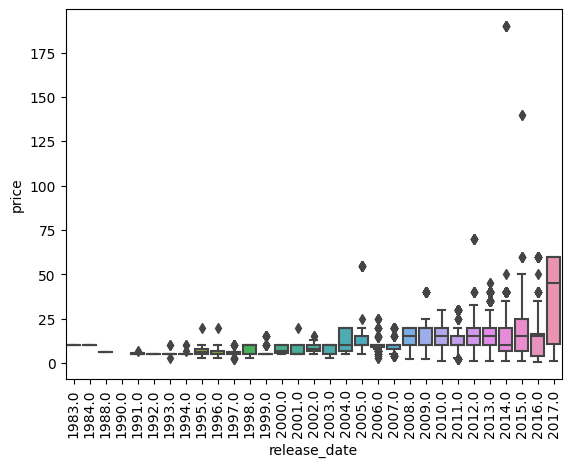

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un boxplot con 'item_name' en el eje x y 'price' en el eje y
sns.boxplot(x='release_date', y='price', data=df_games)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor visualización
plt.show()

En esta grafica observamos que existen precios que pueden ser valores atipicos

##### Calculamos los posible outliers

In [12]:
# Calcular los outliers en la columna 'price'
Q1 = df_games['price'].quantile(0.25)
Q3 = df_games['price'].quantile(0.75)
IQR = Q3 - Q1

In [13]:
# Calculamos los limites
Limite_Inferior = Q1 - 1.5 * IQR
Limite_Superior = Q3 + 1.5 * IQR

In [14]:
# Observamos los outliers que superan los limites
outliers = df_games[(df_games['price'] < Limite_Inferior) | (df_games['price'] > Limite_Superior)]

In [15]:
print("Los valores atipicos de precios que se presentaron con mayor frecuencia fueron:", outliers["price"].value_counts().sort_values())

Los valores atipicos de precios que se presentaron con mayor frecuencia fueron: price
139.92      2
49.99       4
189.96      7
69.99       7
54.99       9
44.99      22
59.99     140
39.99     362
Name: count, dtype: int64


#### Distribucion de analisis de sentimiento por año

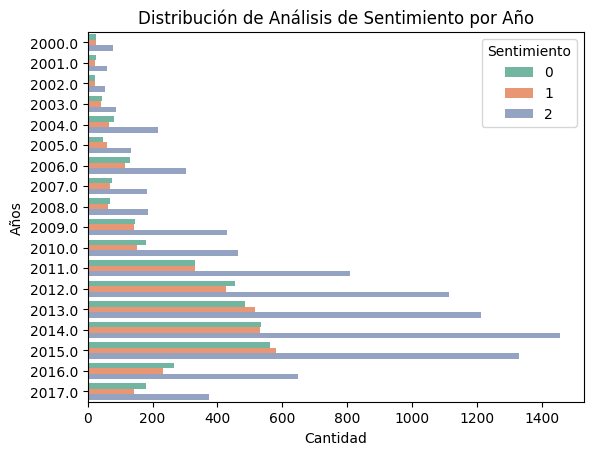

In [16]:
# Graficamos desde el año 2000 en adelante, si la columna "sentiment_analysis" son positivos, negativos o neutros
año_inicio = 2000
df_games_limitado = df_games[df_games['release_date'] >= año_inicio]
ax = sns.countplot(data=df_games_limitado, y='release_date', hue='sentiment_analysis', palette='Set2')
plt.title('Distribución de Análisis de Sentimiento por Año')
plt.xlabel('Cantidad')
plt.ylabel('Años')
plt.legend(title='Sentimiento')
plt.show()

En la gráfica, se observa que a medida que transcurren los años, la cantidad de comentarios positivos experimenta un gran aumento en comparación con los comentarios negativos y neutros.

#### Evolucion a lo largo de los años de comentatios positivos o negativos

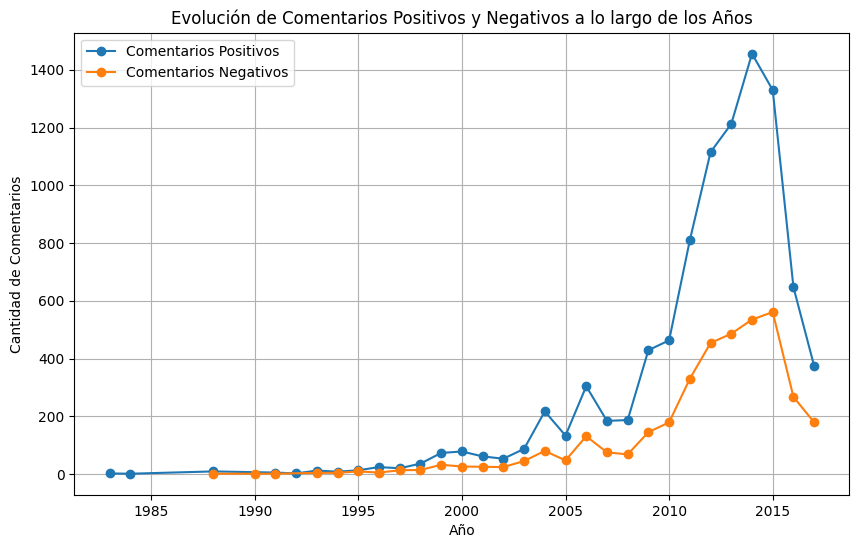

In [17]:
# Filtra los datos por sentimiento positivo
comentarios_positivos = df_games[df_games['sentiment_analysis'] == 2]

# Filtra los datos por sentimiento negativo
comentarios_negativos = df_games[df_games['sentiment_analysis'] == 0]

# Agrupa los datos por año y cuenta la cantidad de comentarios positivos y negativos por año
comentarios_positivos_por_año = comentarios_positivos.groupby('release_date').size()
comentarios_negativos_por_año = comentarios_negativos.groupby('release_date').size()

# Crea un gráfico de línea que muestra la evolución de los comentarios positivos y negativos a lo largo de los años
plt.figure(figsize=(10, 6))
plt.plot(comentarios_positivos_por_año.index, comentarios_positivos_por_año, label='Comentarios Positivos', marker='o')
plt.plot(comentarios_negativos_por_año.index, comentarios_negativos_por_año, label='Comentarios Negativos', marker='o')
plt.title('Evolución de Comentarios Positivos y Negativos a lo largo de los Años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Comentarios')
plt.legend()
plt.grid(True)
plt.show()

Hasta aproximadamente el año 2000, la cantidad de comentarios positivos y negativos se mantuvo en equilibrio. Sin embargo, a partir de ese año, los comentarios positivos y negativos comenzaron a experimentar un crecimiento constante, las dos con fluctuaciones iguales, los comentarios positivos superaron significativamente a los negativos. Ambos tipos de comentarios alcanzaron su punto máximo alrededor del año 2015.